# Лабораторная работа №6

## Задание №1

Изучите материал https://cloud.mail.ru/public/S4Pu/zPnKHX7qT. Выполните задания из
файла https://cloud.mail.ru/public/KtLN/hjdfs92YL.

In [59]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures  # Класс преобразователь
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV

In [2]:
# Моделируем данные
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

In [3]:
X

array([[258.],
       [270.],
       [294.],
       [320.],
       [342.],
       [368.],
       [396.],
       [446.],
       [480.],
       [586.]])

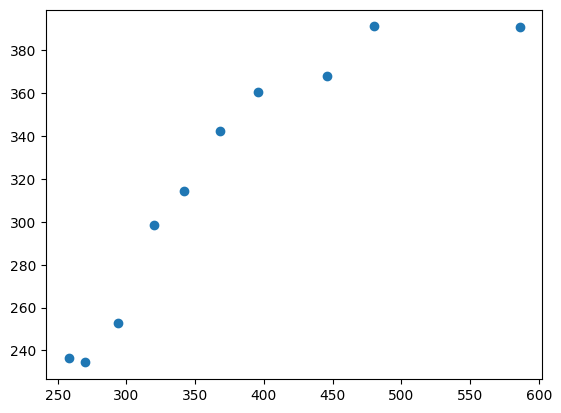

In [4]:
plt.scatter(X, y) 

In [5]:
lr = LinearRegression() # Линейная регрессия
lr.fit(X, y) # Обучим линейную регрессию

LinearRegression()

In [6]:
X_ = np.arange(250, 600, 10)[:, np.newaxis] # Точки для предсказания
y_lr = lr.predict(X_) # Предсказываем y для линейной регрессии

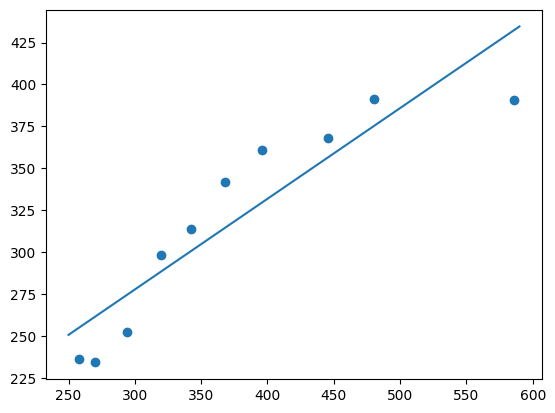

In [7]:
plt.scatter(X, y) 
plt.plot(X_, y_lr) 

In [8]:
pr = LinearRegression() # Полиномиальная регрессия

In [9]:
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)       # Преобразуем данные

In [10]:
X_quad

array([[1.00000e+00, 2.58000e+02, 6.65640e+04],
       [1.00000e+00, 2.70000e+02, 7.29000e+04],
       [1.00000e+00, 2.94000e+02, 8.64360e+04],
       [1.00000e+00, 3.20000e+02, 1.02400e+05],
       [1.00000e+00, 3.42000e+02, 1.16964e+05],
       [1.00000e+00, 3.68000e+02, 1.35424e+05],
       [1.00000e+00, 3.96000e+02, 1.56816e+05],
       [1.00000e+00, 4.46000e+02, 1.98916e+05],
       [1.00000e+00, 4.80000e+02, 2.30400e+05],
       [1.00000e+00, 5.86000e+02, 3.43396e+05]])

In [11]:
pr.fit(X_quad, y) # Обучаем полиномиальную регрессию

LinearRegression()

In [12]:
y_pr = pr.predict(quadratic.fit_transform(X_)) # Предсказываем y для полиномиальной регрессии

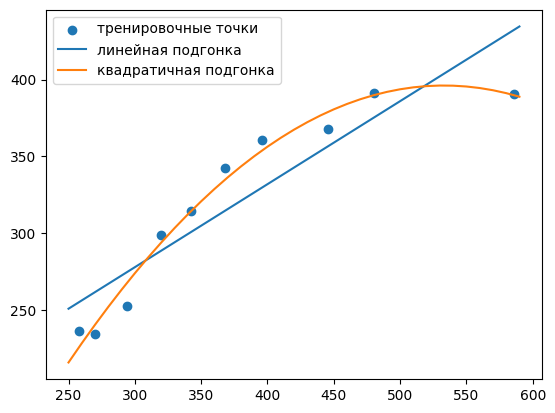

In [13]:
plt.scatter(X, y, label = 'тренировочные точки') 
plt.plot(X_, y_lr, label = 'линейная подгонка') 
plt.plot(X_, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()

Задание 1. Оцените полученные модели с помощью коэффициента детерминации и MSE. Что можно сказать о качестве моделей?

Замечание!!! mean_squared_error принимает 1-м аргументом истинные значения y, а 2-м предсказанные (см. документацию!). Получается, для линейной регрессии:

In [14]:
# Для наших синих точек 

y_pred = lr.predict(X)
print('Для линейной регрессии:', mean_squared_error(y, y_pred))
print('Коэффициент детерминации:', r2_score(y, y_pred))

# Аналогично выполните для полиномиальной модели и сравните результат

y_pred = pr.predict(quadratic.fit_transform(X))
print('Для полиномиальной регрессии:', mean_squared_error(y, y_pred))
print('Коэффициент детерминации:', r2_score(y, y_pred))

Для линейной регрессии: 569.7796663183207
Коэффициент детерминации: 0.8317053837891232
Для полиномиальной регрессии: 61.330214517447324
Коэффициент детерминации: 0.9818850241163605


Задание 2. Постройте полиномиальную модель, описывающую следующую зависимость:

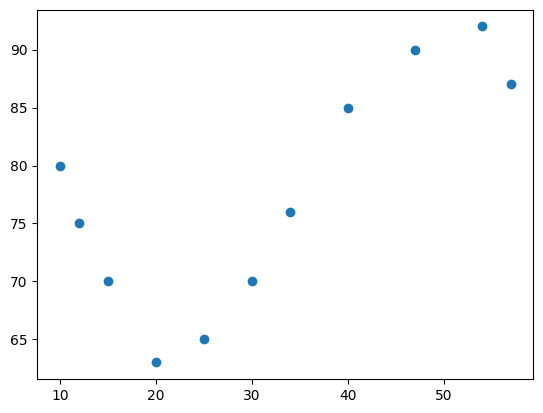

In [15]:
x = np.array([10, 12, 15, 20, 25, 30, 34, 40, 47, 54, 57])[:, np.newaxis]
y = np.array([80, 75, 70, 63, 65, 70, 76, 85, 90, 92, 87 ])

plt.scatter(x, y) # Изображаем точки на графике
plt.show()

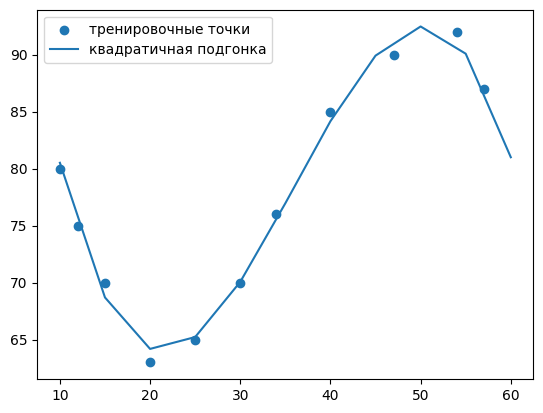

Для полиномиальной регрессии: 26.316381200624537
Коэффициент детерминации: 0.7124542057724789


In [16]:
quadratic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(x)       # Преобразуем данные
pr.fit(X_quad, y) # Обучаем полиномиальную регрессию
X_ = np.arange(10, 65, 5)[:, np.newaxis] # Точки для предсказания
y_pr = pr.predict(quadratic.fit_transform(X_)) # Предсказываем y для полиномиальной регрессии
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(X_, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
print('Для полиномиальной регрессии:', mean_squared_error(y, y_pr))
print('Коэффициент детерминации:', r2_score(y, y_pr))

Задание 3. Какую степень полинома вы использовали? Попробуйте изменить степень полинома, например, на 2, 5, 15? Как меняется результат?

Использовали 3 степень.

2 степень:

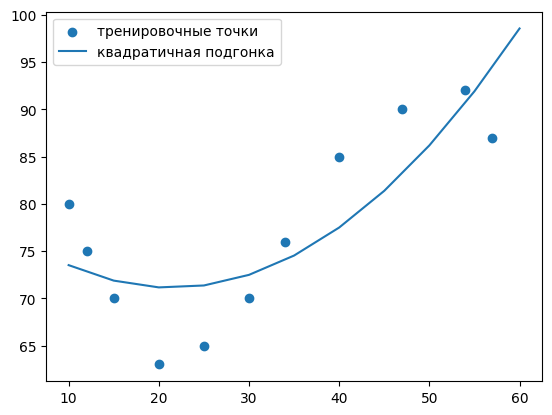

Для полиномиальной регрессии: 33.0017498857522
Коэффициент детерминации: 0.6394065616601033


In [17]:
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(x)       # Преобразуем данные
pr.fit(X_quad, y) # Обучаем полиномиальную регрессию
X_ = np.arange(10, 65, 5)[:, np.newaxis] # Точки для предсказания
y_pr = pr.predict(quadratic.fit_transform(X_)) # Предсказываем y для полиномиальной регрессии
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(X_, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
print('Для полиномиальной регрессии:', mean_squared_error(y, y_pr))
print('Коэффициент детерминации:', r2_score(y, y_pr))

5 степень:

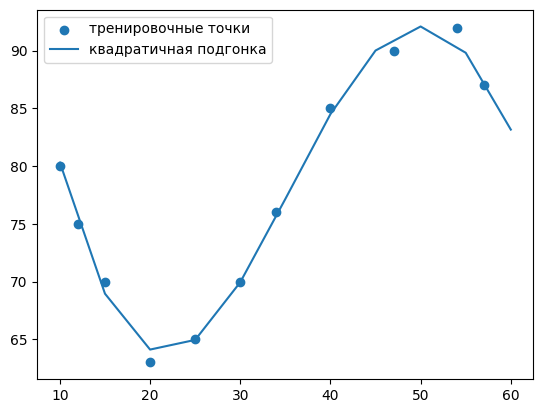

Для полиномиальной регрессии: 24.733293491552846
Коэффициент детерминации: 0.7297518049053735


In [18]:
quadratic = PolynomialFeatures(degree=5)
X_quad = quadratic.fit_transform(x)       # Преобразуем данные
pr.fit(X_quad, y) # Обучаем полиномиальную регрессию
X_ = np.arange(10, 65, 5)[:, np.newaxis] # Точки для предсказания
y_pr = pr.predict(quadratic.fit_transform(X_)) # Предсказываем y для полиномиальной регрессии
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(X_, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
print('Для полиномиальной регрессии:', mean_squared_error(y, y_pr))
print('Коэффициент детерминации:', r2_score(y, y_pr))

15 степень:

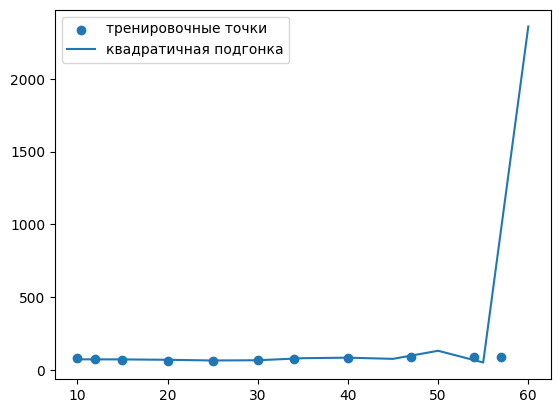

Для полиномиальной регрессии: 469552.1413814107
Коэффициент детерминации: -5129.5588863238845


In [19]:
quadratic = PolynomialFeatures(degree=15)
X_quad = quadratic.fit_transform(x)       # Преобразуем данные
pr.fit(X_quad, y) # Обучаем полиномиальную регрессию
X_ = np.arange(10, 65, 5)[:, np.newaxis] # Точки для предсказания
y_pr = pr.predict(quadratic.fit_transform(X_)) # Предсказываем y для полиномиальной регрессии
plt.scatter(x, y, label = 'тренировочные точки') 
plt.plot(X_, y_pr, label = 'квадратичная подгонка') 
plt.legend(loc='upper left') 
plt.show()
print('Для полиномиальной регрессии:', mean_squared_error(y, y_pr))
print('Коэффициент детерминации:', r2_score(y, y_pr))

Результат стал хуже

## Задание №2

Выполните задания из файла https://cloud.mail.ru/public/CDUu/PZPV4W8FX. Данные
скачайте отсюда https://cloud.mail.ru/public/ZyCV/8w6p1i19o.

1. Загрузите данные в DataFrame, используя функцию read_csv.

In [20]:
df = pd.read_csv('house_price.csv')

2. Сколько строк и столбцов в данных? Есть ли пропуски? Используйте метод
info().

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

3. Для выполнения задания в наборе данных необходимо оставить только
числовые признаки. Для этого можно использовать следующий программный
код (а можно придумать свой):

In [22]:
numeric_dtypes = ['int64', 'float64']
numerics = []
for i in df.columns:
    if df[i].dtype in numeric_dtypes:
        numerics.append(i)
df = df[numerics]

4. Удалите столбец Id и пропущенные значения

In [23]:
del df['Id']
df = df.dropna()

5. Разделите набор данных на входные данные X (все столбцы кроме SalePrice)
и ответы y (столбец SalePrice).

In [24]:
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

6. Разделите данные на обучающую и тестовую выборки.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

7. Обучите модель LassoCV (установите значение гиперпараметра cv
самостоятельно). Оцените качество полученной модели. Посмотрите на 
коэффициенты модели. Есть ли коэффициенты равные 0? Что это означает?
Сделайте выводы.

In [26]:
lasso = LassoCV(cv=5) # Для примера возьмем cv = 5 Это означает, что для подбора alpha будет использоваться 5-блочная
#перекрестная проверка.
lasso.fit(X_train, y_train) # Обучаем

LassoCV(cv=5)

In [27]:
lasso.score(X_test, y_test) # Оцениваем качество

0.7483887363346228

In [28]:
lasso.coef_ # Значения коэффициентов

array([ -0.        ,  -0.        ,   0.44584531,   0.        ,
         0.        , 366.90662176, 191.50797121,  31.61891697,
         9.49435623,   0.39058882,  -0.        ,  25.43615783,
         3.23633319,   0.        ,  -0.        ,  57.59926723,
         0.        ,  -0.        ,   0.        ,   0.        ,
        -0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,  74.29640785,  34.30054188,
         0.        ,  -0.        ,   0.        ,   0.        ,
        -0.        ,  -3.6500231 ,   0.        ,   0.        ])

Есть коэффициенты раные 0. Это означается что есть параметры от которых цена не зависит

## Задание №3

Обучите модель линейной регрессии на данных согласно вашему варианту. Выведите
угловой коэффициент, точку пересечения с осью ординат и точность.

Вариант 4: y = 2 * x + random(4)

In [29]:
func = lambda x: 2 * x + np.random.random(*x.shape) * 4
x = np.array([[i] for i in np.arange(0, 10, 1)])
y = np.array([func(i) for i in x])

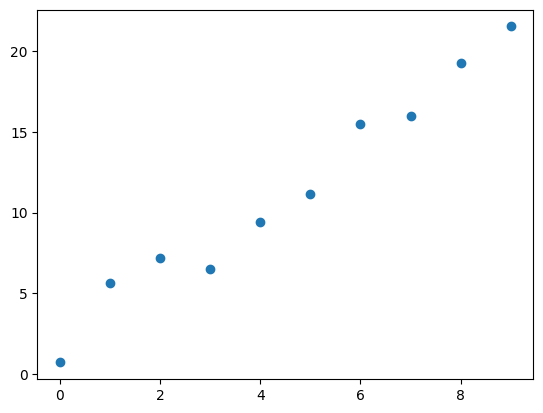

In [30]:
plt.scatter(x, y) 

In [31]:
lr = LinearRegression() # Линейная регрессия
lr.fit(x, y) # Обучим линейную регрессию

LinearRegression()

In [32]:
X_ = np.arange(-5, 15, 1)[:, np.newaxis] # Точки для предсказания
y_lr = lr.predict(X_) # Предсказываем y для линейной регрессии

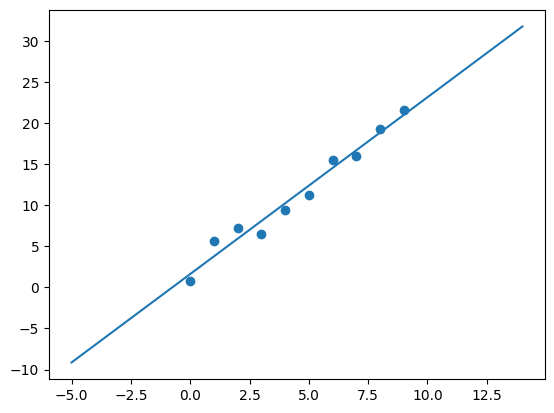

In [33]:
plt.scatter(x, y) 
plt.plot(X_, y_lr) 

In [34]:
y_pred = lr.predict(x)
print('MSE:', mean_squared_error(y, y_pred))
print('Коэффициент детерминации:', r2_score(y, y_pred))

MSE: 1.2371233794194172
Коэффициент детерминации: 0.9686145016160856


## Задание №4

Скачайте датасет https://cloud.mail.ru/public/SAi2/M1AzFm7BC, в котором по дням
записаны календарная информация и погодные условия, характеризующие
автоматизированные пункты проката велосипедов, а также число прокатов в этот день (это
значение необходимо предсказывать).
Для каждого дня проката известны следующие признаки (как они были указаны в источнике
данных):


* season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
* yr: 0 - 2011, 1 - 2012
* mnth: от 1 до 12
* holiday: 0 - нет праздника, 1 - есть праздник
* weekday: от 0 до 6
* workingday: 0 - нерабочий день, 1 - рабочий день
* weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
* temp: температура в Цельсиях
* atemp: температура по ощущениям в Цельсиях
* hum: влажность
* windspeed(mph): скорость ветра в милях в час
* windspeed(ms): скорость ветра в метрах в секунду
* cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)


Выполните следующие шаги:
1. Покажите на графиках, как целевой признак зависит от остальных. Каков характер
зависимости числа прокатов от месяца? Укажите один или два признака, от которых
число прокатов скорее всего зависит линейно.
2. Есть ли в данных похожие или дублирующие друг друга признаки? Как вы можете
показать их похожесть? Удалите такие признаки из датасета.
3. Разбейте данные на тренировочные и тестовые. Обучите модель линейной
регрессии. Выведите точность предсказания модели для тестовых данных.

In [35]:
df = pd.read_csv('bikes_rent.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          731 non-null    int64  
 1   yr              731 non-null    int64  
 2   mnth            731 non-null    int64  
 3   holiday         731 non-null    int64  
 4   weekday         731 non-null    int64  
 5   workingday      731 non-null    int64  
 6   weathersit      731 non-null    int64  
 7   temp            731 non-null    float64
 8   atemp           731 non-null    float64
 9   hum             731 non-null    float64
 10  windspeed(mph)  731 non-null    float64
 11  windspeed(ms)   731 non-null    float64
 12  cnt             731 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 74.4 KB


1. Покажите на графиках, как целевой признак зависит от остальных. Каков характер
зависимости числа прокатов от месяца? Укажите один или два признака, от которых
число прокатов скорее всего зависит линейно.

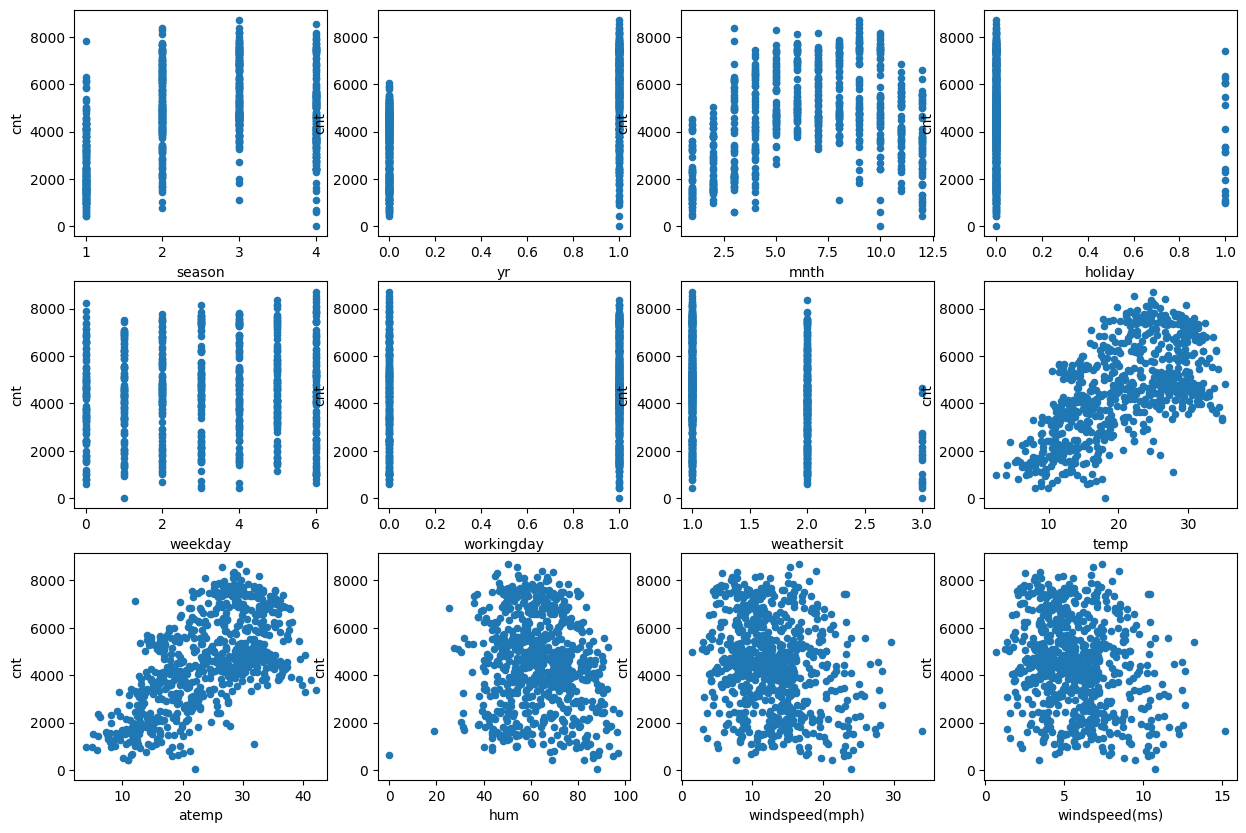

In [36]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[int(idx / 4), idx % 4])

Характер зависимости числа прокатов от месяца криволинейный (синусоида с пиком летом)

Признак, от которого число прокатов скорее всего зависит линейно - температура (temp)

2. Есть ли в данных похожие или дублирующие друг друга признаки? Как вы можете
показать их похожесть? Удалите такие признаки из датасета.

In [37]:
print('Корреляция:')
df[['temp','atemp','hum','windspeed(mph)','windspeed(ms)','cnt']].corr()

Корреляция:


,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
temp,1.000000,0.991702,0.126963,-0.157944,-0.157944,0.627494
atemp,0.991702,1.000000,0.139988,-0.183643,-0.183643,0.631066
hum,0.126963,0.139988,1.000000,-0.248489,-0.248489,-0.100659
windspeed(mph),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
windspeed(ms),-0.157944,-0.183643,-0.248489,1.000000,1.000000,-0.234545
cnt,0.627494,0.631066,-0.100659,-0.234545,-0.234545,1.000000


Похожие признаки - temp и atemp

Дублирующие признаки - windspeed(mph) и windspeed(ms)

In [38]:
del df['atemp']
del df['windspeed(mph)']

In [39]:
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,4.805490,985
1,1,0,1,0,0,0,2,14.902598,69.6087,7.443949,801
2,1,0,1,0,1,1,1,8.050924,43.7273,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,5.597810,1600


3. Разбейте данные на тренировочные и тестовые. Обучите модель линейной
регрессии. Выведите точность предсказания модели для тестовых данных.

In [40]:
x = df.loc[:, df.columns != 'cnt']
y = df['cnt']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [41]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
lr.score(X_test, y_test)

0.8231919187657437

## Задание №5

С сайта https://www.kaggle.com/ скачайте датасет на ваш выбор для обучения модели
линейной регрессии. Выполните следующие действия:
1. Опишите выбранный набор данных: контекст данных, какие данные есть в наборе,
как можно будет использовать полученные результаты предсказания.
2. Выберите выходную прогнозируемую переменную.
3. Постройте линейную регрессионную модель с несколькими значимыми
параметрами (оцените корреляции между признаками, последовательно добавляйте
признаки и сравнивайте качество получаемых моделей, оцените адекватность
модели).
4. Интерпретируйте результаты моделирования (что значит полученная формула,
какие переменные вносят больший вклад).
5. Спрогнозируйте несколько новых значений с помощью построенной модели.

In [43]:
df = pd.read_csv('cement.csv')
df.head(5)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


1) Датасет представляет собой данные о бетоне

* cement - цемент (кг/м^3)
* slag - шлак (кг/м^3)
* flyash - летучая зола (кг/м^3)
* water - вода (кг/м^3)
* superplasticizer - суперпластификатор (кг/м^3)
* coarseaggregate - крупный заполнитель (кг/м^3)
* fineaggregate - мелкий заполнитель (кг/м^3)
* age - возраст (дни)
* csMPa - прочность на сжатие (МПа)

Данные можно будет использовать для предсказания о том насколько прочный бетон

2) Выходная прогнозируемая переменная - csMPa

3. Корреляция

In [44]:
df.corr()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
flyash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseaggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineaggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
csMPa,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


Наиболее подходящие признаки для обучения - cement, superplasticizer, age

In [45]:
df_1 = df[['cement', 'superplasticizer', 'age', 'csMPa']]
X = df_1.drop('csMPa', axis = 1)
y = df_1['csMPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
lr.score(X_test, y_test)

0.4765948629629667

In [48]:
X = df.drop('csMPa', axis = 1)
y = df['csMPa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
lr.score(X_test, y_test)

0.5943782479239206

4. Из-за того что признаки слабо между собой коррелируют, качество полученной модели не особо высокое

## Задание №6

Различные метрики качества реализованы в пакете sklearn.metrics. Подробнее о них
смотрите в лекции или в учебных пособиях, например, https://github.com/esokolov/ml-
course-msu/blob/master/ML15/lecture-notes/Sem05_metrics.pdf.

1. Загрузите файл classification.csv (https://cloud.mail.ru/public/QGde/JFrAntvih). В нем
записаны истинные классы объектов выборки (колонка true) и ответы некоторого
классификатора (колонка predicted).

In [51]:
df = pd.read_csv('classification.csv')
df.head(5)

,true,pred
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1


2. Заполните таблицу ошибок классификации:Для этого подсчитайте величины TP, FP, FN и TN согласно их определениям.
Например, FP — это количество объектов, имеющих класс 0, но отнесенных
алгоритмом к классу 1.

![](./class.png)

In [52]:
TP = df.loc[(df['true'] == 1) & (df['pred'] == 1)].shape[0]
FP = df.loc[(df['true'] == 0) & (df['pred'] == 1)].shape[0]
FN = df.loc[(df['true'] == 1) & (df['pred'] == 0)].shape[0]
TN = df.loc[(df['true'] == 0) & (df['pred'] == 0)].shape[0]
print(TP, FP, FN, TN)

43 34 59 64


3. Посчитайте основные метрики качества классификатора:

* a. Accuracy (доля верно угаданных) — sklearn.metrics.accuracy
* b. Precision (точность) — sklearn.metrics.accuracy.precision_score
* c. Recall (полнота) — sklearn.metrics.recall_score
* d. F-мера — sklearn.metrics.f1_score

In [60]:
t = df['true']
p = df['pred']
print('Accuracy: ', accuracy_score(t, p))
print('Precision: ', precision_score(t, p))
print('Recall: ', recall_score(t, p))
print('F-мера: ', f1_score(t, p))

Accuracy:  0.535
Precision:  0.5584415584415584
Recall:  0.4215686274509804
F-мера:  0.48044692737430167
